In [104]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [105]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [106]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    num_samples, num_feature = data.shape
    return data[np.random.choice(num_samples, k)]

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [107]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    distance_list = []
    num_cluster, _ = mu.shape
    for k_th in range(num_cluster):
        sum_squares = np.sum(np.square(data - mu[k_th, :]), axis=1)
        distance_list.append(sum_squares)
    return np.array(distance_list).T

In [108]:
type(build_distance_matrix(data, mu))

numpy.ndarray

#### Update k-means parameters

In [109]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    _, num_features = data.shape
    num_clusters, _ = mu_old.shape
    distance_matrix = build_distance_matrix(data, mu_old)
    print(distance_matrix.shape)
    losses = np.min(distance_matrix, axis=1)
    assignments = np.argmin(distance_matrix, axis=1)

    # update the mu
    mu = np.empty((num_clusters, num_features))
    for k_th in range(num_clusters):
        rows = np.where(assignments == k_th)
        mu[k_th, :] = np.mean(np.squeeze(data[rows, :]), axis=0)
    return losses, assignments, np.nan_to_num(mu)

In [110]:
m = np.random.randint(10, size=(20, 2))
mu = np.random.randint(15, size=(3, 2))
losses, assignments, mu = update_kmeans_parameters(m, mu)
print(losses, assignments.shape, mu.shape)

(20, 3)
[58 20 16  2 58 32 25 25 58 50 17 26 40 17 17 29  2 68  4 13] (20,) (3, 2)


/Users/Raphael/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Raphael/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


#### Play with k-means

(272, 3)
The current iteration of k-means is: 0,                the average loss is 189.4020088272059.


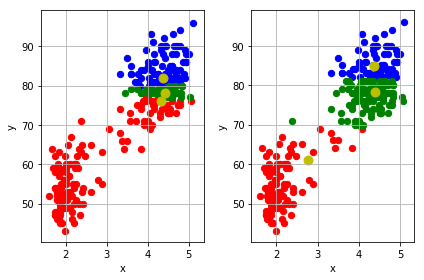

(272, 3)
The current iteration of k-means is: 1,                the average loss is 35.63754278888153.


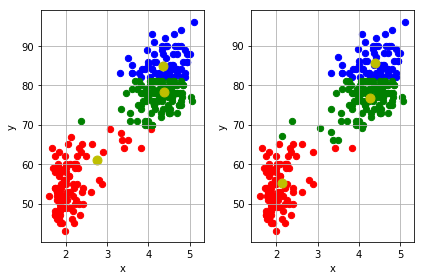

(272, 3)
The current iteration of k-means is: 2,                the average loss is 19.919243260490127.


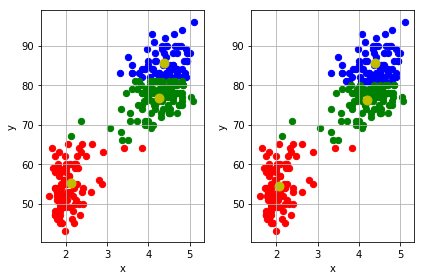

(272, 3)
The current iteration of k-means is: 3,                the average loss is 19.538747747509.


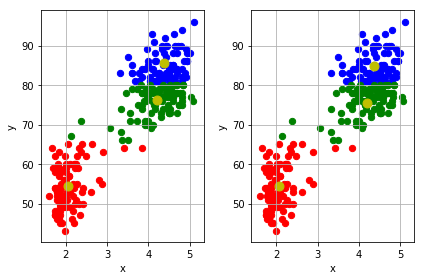

(272, 3)
The current iteration of k-means is: 4,                the average loss is 19.224481029478646.


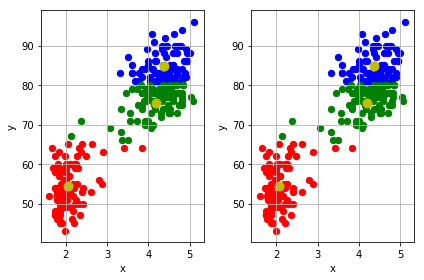

(272, 3)
The current iteration of k-means is: 5,                the average loss is 19.224481029478646.


In [131]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iteration, l=average_loss))
        # check converge
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iteration))
        # update k-means information.
        mu_old = mu

# define parameters
k = 3
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [132]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [133]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = original_image.reshape(
        (original_image.shape[0] * original_image.shape[1], 3))
    processed_image = processed_image.astype(float)
    print(
        "Current image: the shape of image={s}, the data type={dt}.".format(
            s=processed_image.shape, dt=processed_image.dtype))
    
    return processed_image

processed_image = preprocess_image(original_image)

Current image: the shape of image=(230400, 3), the data type=float64.


(230400, 3)


(230400, 5)
The current iteration of kmeans is: 0, the average loss is 4024.709609375.
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
The current iteration of kmeans is: 10, the average loss is 1843.1542471287414.
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
The current iteration of kmeans is: 20, the average loss is 1636.3689995509992.
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
The current iteration of kmeans is: 30, the average loss is 1632.0036822040022.
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
The current iteration of kmeans is: 40, the average loss is 1631.9693544415202.
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(230400, 5)
(2304

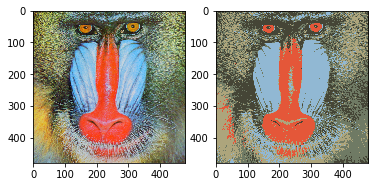

<Figure size 432x288 with 0 Axes>

In [142]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    mu_old = initialize_clusters(processed_image, k)
    
    # init some empty lists to store the result.
    loss_list = []
    
    # start the kmeans
    for iter in range(max_iter):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)

        if iter % 10 == 0:
            print(
                "The current iteration of kmeans is: {i}, the average loss is {l}.".format(
                    i=iter, l=average_loss))
        
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        # update mu
        mu_old = mu
        
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)